In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [46]:
cust_df = pd.read_csv("customerID.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df = cust_df.copy()
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [48]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [50]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
df['Gender'], Gender = pd.factorize(df['Gender'])
print(Gender)
df.head()

Index(['Male', 'Female'], dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [52]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,2:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

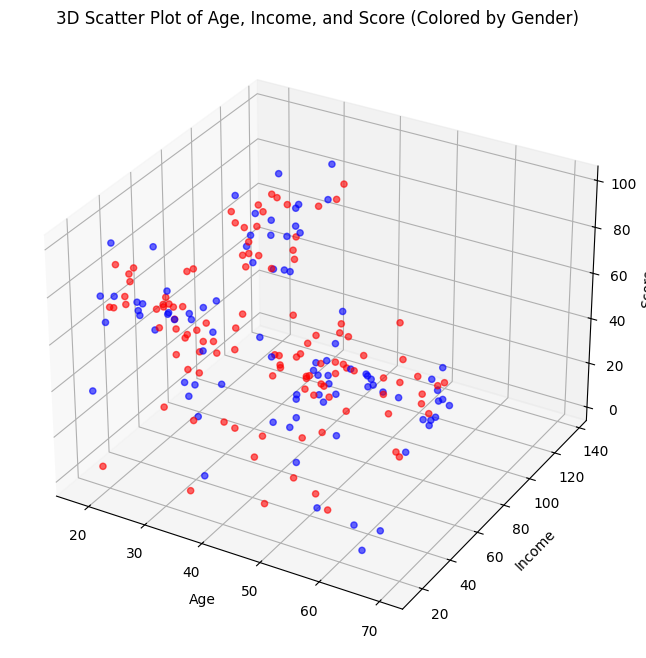

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue' if Gender == 0 else 'red' for Gender in df['Gender']]

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], color=colors, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('3D Scatter Plot of Age, Income, and Score (Colored by Gender)')

plt.show()

<h1>K-Means</h1>

In [54]:
df_kmeans = df.copy()

In [55]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [56]:
df_kmeans["kmeans"] = labels
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [57]:
df_kmeans.groupby('kmeans').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
kmeans,,,,,
0,62.0,0.593496,40.325203,44.154472,49.829268
1,162.0,0.538462,32.692308,86.538462,82.128205
2,162.0,0.473684,40.394737,87.000000,18.631579


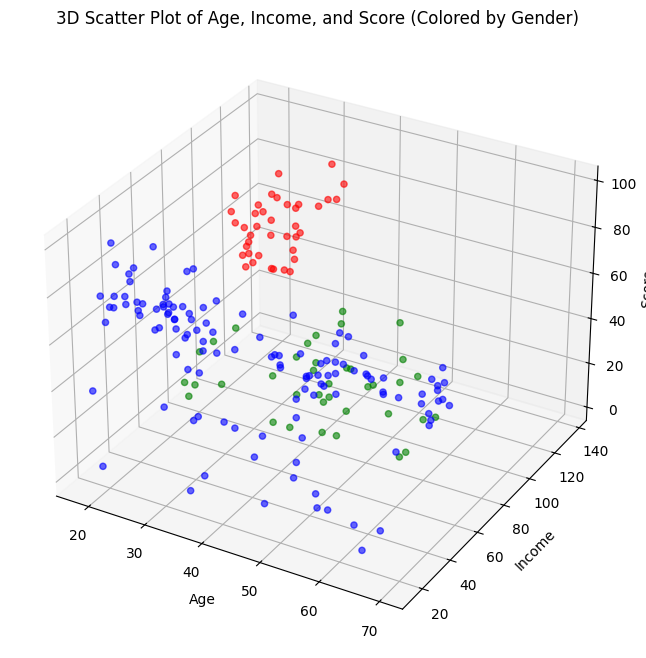

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue' if kmeans == 0 else 'red' if kmeans == 1 else 'green'  for kmeans in df_kmeans['kmeans']]

scatter = ax.scatter(X[:,0], X[:,1], X[:,2], color=colors, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('3D Scatter Plot of Age, Income, and Score')

plt.show()

<h1>Hierarchical</h1>

In [262]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [258]:
df_hierarchical = df.copy()

In [259]:
linked = linkage(X, method='ward')

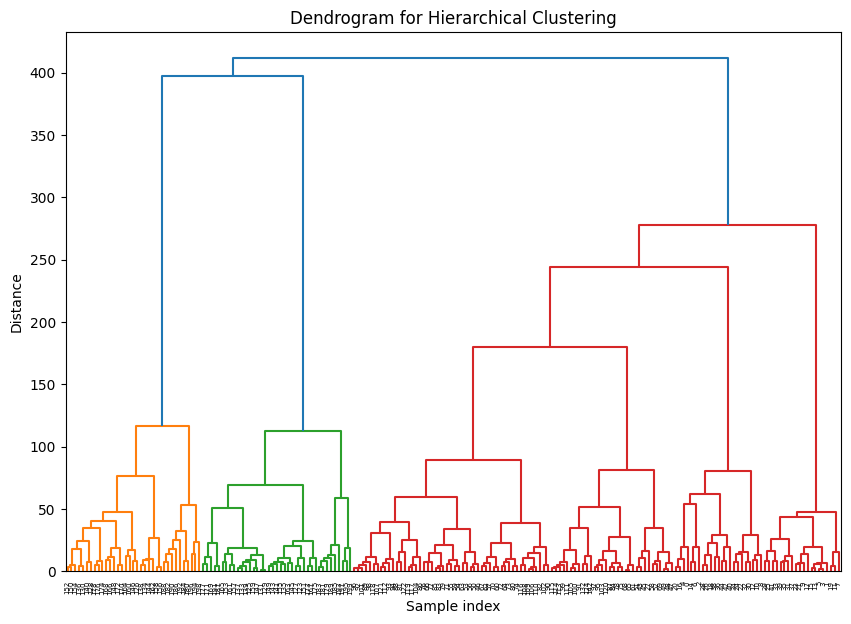

In [260]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df_hierarchical.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [267]:
n_clusters = 3  
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

In [268]:
df_hierarchical['hierarchical'] = hc.fit_predict(X)

In [270]:
df_hierarchical.groupby('hierarchical').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean', 'Gender': 'size'})

,Age,Annual Income (k$),Spending Score (1-100),Gender
hierarchical,,,,
0,39.968254,44.833333,49.460317,126
1,41.685714,88.228571,17.285714,35
2,32.692308,86.538462,82.128205,39


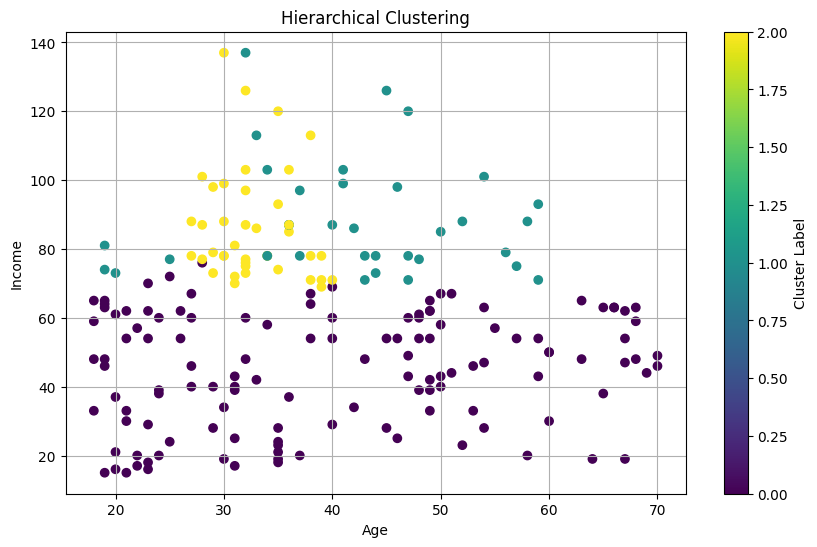

In [273]:
plt.figure(figsize=(10, 6))
plt.scatter(df_hierarchical['Age'], df_hierarchical['Annual Income (k$)'], c=df_hierarchical['hierarchical'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

<h1>DBSCAN</h1>

In [249]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [88]:
df_dbscan = df.copy()

In [250]:
eps_values = np.arange(0.1, 100, 0.1)
min_samples_values = range(2, 100)

best_eps = None
best_min_samples = None
best_score = -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:
            score = silhouette_score(X, labels)
            
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score
                best_labels = labels

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

Best eps: 15.700000000000001
Best min_samples: 2
Best silhouette score: 0.3049360034125826


In [251]:
epsilon = 15.700000000000001
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

In [252]:
df_dbscan["dbscan"] = labels
df_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),dbscan
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [253]:
df_dbscan.groupby('dbscan').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean', 'Gender': 'size'})

,Age,Annual Income (k$),Spending Score (1-100),Gender
dbscan,,,,
-1,32.000000,137.000000,18.000000,1
0,38.812183,59.538071,50.649746,197
1,46.000000,123.000000,22.000000,2


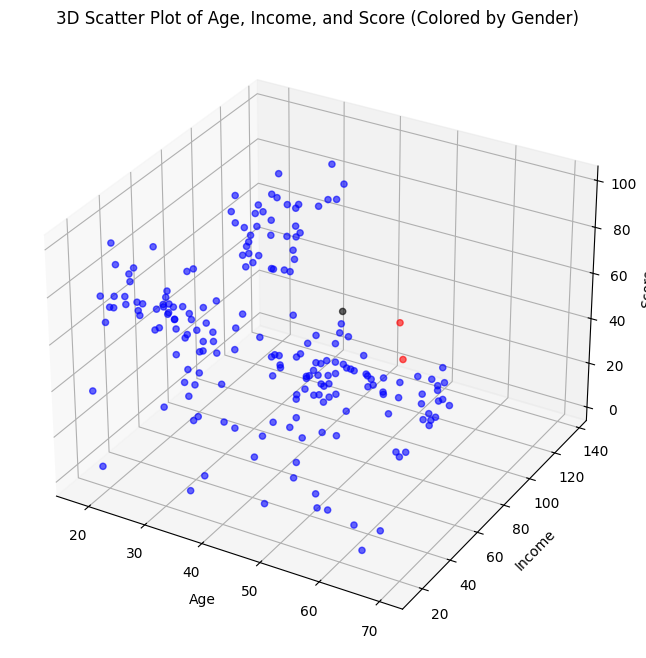

In [254]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue' if dbscan == 0 else 'red' if dbscan == 1 else 'green' if dbscan == 2 else 'yellow' if dbscan == 3 else 'black'  for dbscan in df_dbscan['dbscan']]

scatter = ax.scatter(X[:,0], X[:,1], X[:,2], color=colors, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('3D Scatter Plot of Age, Income, and Score (Colored by Gender)')

plt.show()